## 2.5 Seasonal subseries plots

In [1]:
%load_ext autoreload
%autoreload 2

In [57]:
import pandas as pd
from plotnine import aes, geom_line, theme, labs, facet_grid, ggplot, element_text, geom_hline, labeller

In [28]:
PBS = pd.read_csv('../data/tsibbledata/PBS.csv')
PBS['Date'] = pd.to_datetime(PBS['Month'], format='%Y %b')
PBS['Month'] = PBS['Date'].dt.strftime('%b')
PBS['month_number'] = PBS['Date'].dt.month
PBS['Year'] = PBS['Date'].dt.year
a10 = (
    PBS.query('ATC2 == "A10"')  # Filter rows where ATC2 is "A10"
    .groupby('Date', as_index=False)  # Group by Month
    .agg({'Cost': 'sum', 'Year': 'first', 'Month': 'first', 'month_number': 'first'})  # Summarize total cost by month
    .assign(Cost=lambda df: df['Cost'] / 1e6)  # Convert cost to millions
    .sort_values(by=['Year', 'month_number'])
)

In [65]:
def col_fn(n):
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    return months[int(n)-1]

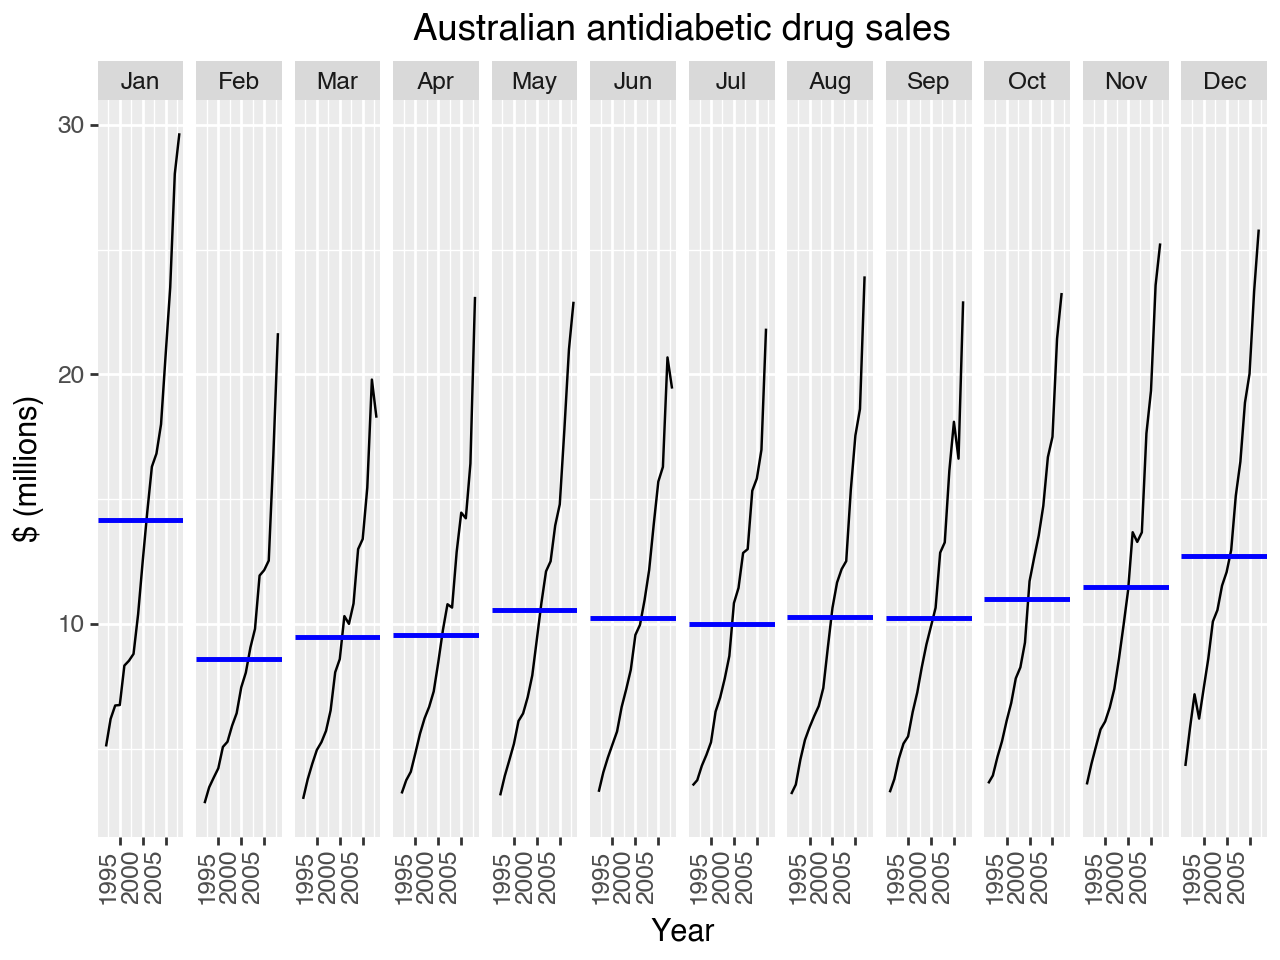

In [66]:
ggplot(a10) \
    + aes(x='Year', y='Cost') \
    + facet_grid(cols="month_number", labeller=labeller(cols=col_fn))   \
    + geom_line() \
    + geom_hline(data=a10.groupby('month_number').agg({'Cost': 'mean'}).reset_index(), 
        mapping=aes(yintercept='Cost'), color="blue", size=1) \
    + labs(y = "$ (millions)",
    title = "Australian antidiabetic drug sales") \
    + theme(axis_text_x=element_text(rotation=90, hjust=1))

### Australian holiday tourism

In [ ]:
df_tourism = pd.read_csv('../data/tsibble/tourism.csv')
df_tourism['date'] = pd.to_datetime([
    '-'.join(x.split()) for x in df_tourism['Quarter']])

In [157]:
df_tourism['Quarter'] = df_tourism['Quarter'].apply(lambda x: x.split(' ')[-1])

In [159]:
df = (
df_tourism
.query('Purpose == "Holiday"')
.groupby(['State', 'Quarter', 'date'])
.agg({'Trips': 'sum'})
.reset_index()
)

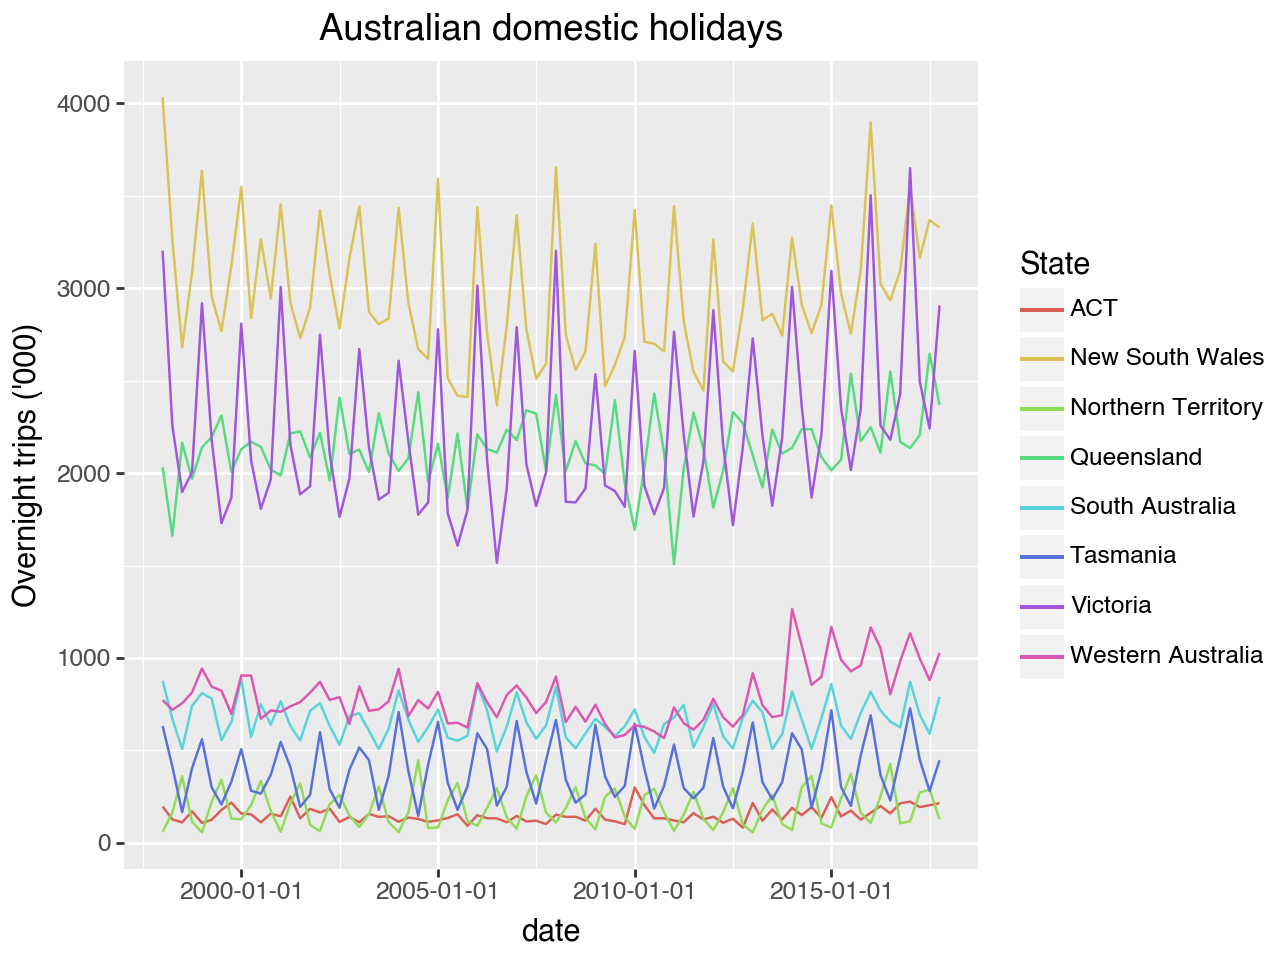

In [160]:
ggplot(df) \
    + aes(x='date', y='Trips', color='State') \
    + geom_line() \
    + labs(
        y = "Overnight trips ('000)",
       title = "Australian domestic holidays")

In [162]:
df_tourism['Year'] = df_tourism['date'].dt.year

In [163]:
df = (df_tourism
.query('Purpose == "Holiday"')
.groupby(['State', 'Quarter', 'Year'])
.agg({'Trips': 'sum'})
.reset_index()
)

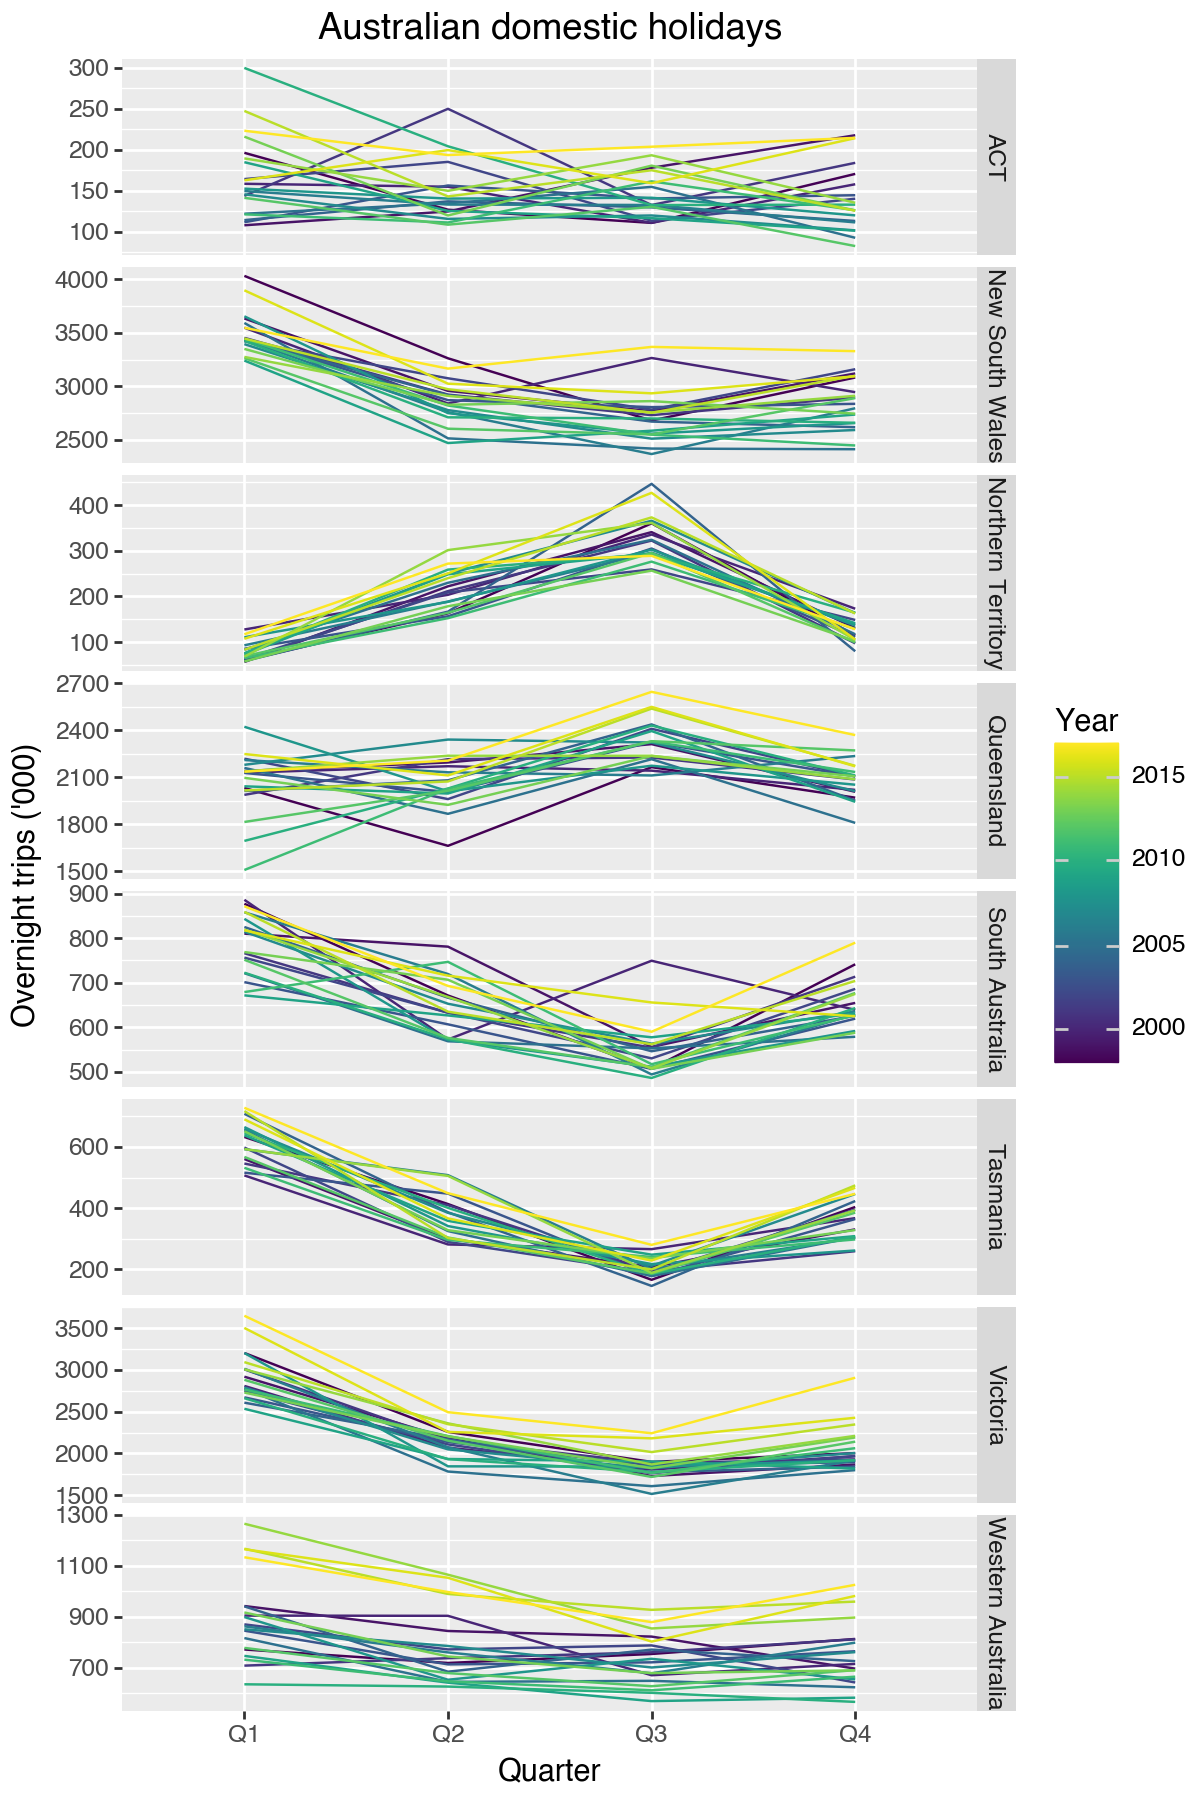

In [164]:
ggplot(df) \
    + aes(x='Quarter', y='Trips', color='Year', group='Year') \
    + facet_grid(rows='State', scales='free') \
    + geom_line() \
    + labs(y = "Overnight trips ('000)",
       title = "Australian domestic holidays") \
    + theme(figure_size=(6, 9)) 

The corresponding subseries plot is shown below:

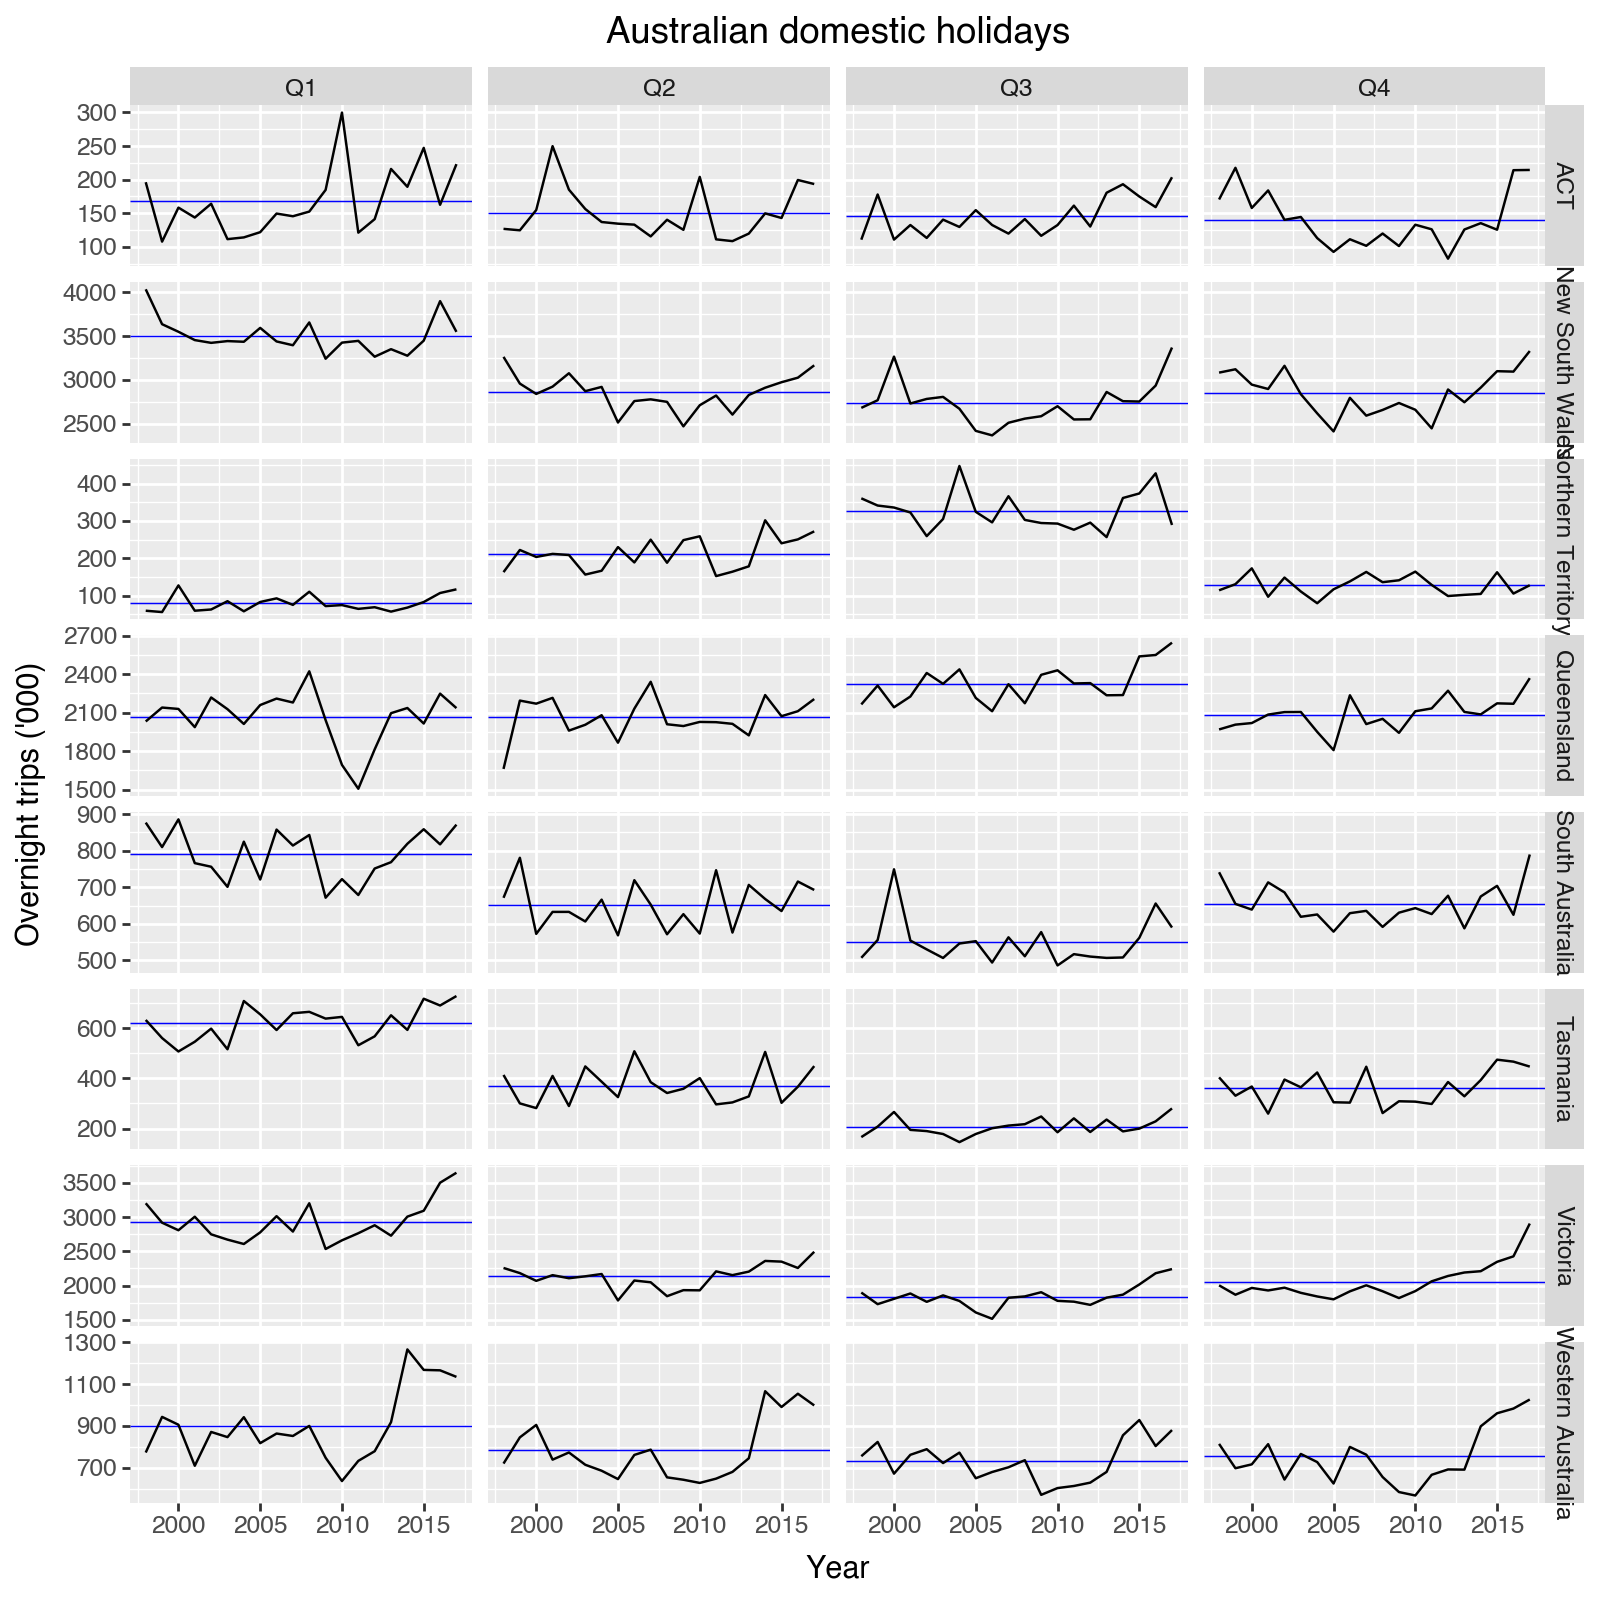

In [165]:
ggplot(df) \
+ aes(x="Year", y="Trips") \
+ facet_grid(rows='State', cols='Quarter', scales='free') \
+ geom_hline(data=df.groupby(['Quarter', 'State']).agg({'Trips': 'mean'}).reset_index(), 
        mapping=aes(yintercept='Trips'), color="blue", size=0.3) \
+ geom_line() \
+ labs(y = "Overnight trips ('000)",
       title = "Australian domestic holidays") \
+ theme(figure_size=(8, 8))

This figure makes it evident that Western Australian tourism has jumped markedly in recent years, while Victorian tourism has increased in Q1 and Q4 but not in the middle of the year.